In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("winequality.csv")

In [4]:
df

,Unnamed: 0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
0,0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,NaN
4,4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,1596,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,NaN


## Overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   index                 1599 non-null   int64  
 2   fixed acidity         1599 non-null   float64
 3   volatile acidity      1599 non-null   float64
 4   citric acid           1599 non-null   float64
 5   residual sugar        1599 non-null   float64
 6   chlorides             1599 non-null   float64
 7   free sulfur dioxide   1599 non-null   float64
 8   total sulfur dioxide  1599 non-null   float64
 9   density               1599 non-null   float64
 10  pH                    1599 non-null   float64
 11  sulphates             1599 non-null   float64
 12  alcohol               1599 non-null   float64
 13  quality_y             1500 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 175.0 KB


We have 1599 rows and 14 columns with column quality_y having 99 missing values.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1599.0,799.000000,461.735855,0.00000,399.5000,799.00000,1198.500000,1598.00000
index,1599.0,799.000000,461.735855,0.00000,399.5000,799.00000,1198.500000,1598.00000
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369


In [9]:
df.drop(columns=['index'], inplace=True)
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1599 non-null   int64  
 1   fixed acidity         1599 non-null   float64
 2   volatile acidity      1599 non-null   float64
 3   citric acid           1599 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality_y             1500 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 162.5 KB


- quality_y ranges from 3 to 8 suggesting a categorical rating for wine quality.
- Variables like free sulfur dioxide and total sulfur dioxide have high maximum values indicating possible outliers.

## Missing Values

In [12]:
df.isnull().sum()

id                       0
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality_y               99
dtype: int64

In [13]:
df[df['quality_y'].isnull()].head(10)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,NaN
99,99,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,NaN
141,141,8.3,0.715,0.15,1.8,0.089,10.0,52.0,0.99680,3.23,0.77,9.5,NaN
158,158,7.1,0.680,0.00,2.2,0.073,12.0,22.0,0.99690,3.48,0.50,9.3,NaN
168,168,6.8,0.630,0.07,2.1,0.089,11.0,44.0,0.99530,3.47,0.55,10.4,NaN
184,184,6.7,0.620,0.21,1.9,0.079,8.0,62.0,0.99700,3.52,0.58,9.3,NaN
202,202,6.8,0.500,0.11,1.5,0.075,16.0,49.0,0.99545,3.36,0.79,9.5,NaN
221,221,7.4,0.530,0.26,2.0,0.101,16.0,72.0,0.99570,3.15,0.57,9.4,NaN
224,224,8.4,0.635,0.36,2.0,0.089,15.0,55.0,0.99745,3.31,0.57,10.4,NaN
226,226,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,NaN


In [14]:
from sklearn.impute import KNNImputer

I chose KNN Imputation to fill the 99 missing values in quality_y because it maintains relationships between variables better than simple methods like mean or median. This ensures that the imputed values are more realistic based on similar data points. Wine quality is influenced by multiple factors (e.g., acidity, alcohol, pH) and KNN considers them when imputing missing values. 

To test how n_neighbors affects the imputation results, I experimented with 3, 5 and 7 neighbors. However, the results remained almost identical, meaning that increasing the number of neighbors did not significantly change the imputed values. Wine quality is limited to values between 3 and 8. The missing values likely have similar neighbors, so the imputed values don’t change much.

In [16]:
for k in [3, 5, 7]:
    knn_imputer = KNNImputer(n_neighbors=k, weights="uniform")
    df_test = df.copy()
    df_test[['quality_y']] = knn_imputer.fit_transform(df[['quality_y']])
    df_test['quality_y'] = df_test['quality_y'].round().astype(int)
    
    print(f"n_neighbors={k}:")
    print(df_test['quality_y'].describe(), "\n")

n_neighbors=3:
count    1599.000000
mean        5.657911
std         0.780663
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality_y, dtype: float64 

n_neighbors=5:
count    1599.000000
mean        5.657911
std         0.780663
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality_y, dtype: float64 

n_neighbors=7:
count    1599.000000
mean        5.657911
std         0.780663
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality_y, dtype: float64 



In [17]:
features = df.drop(columns=['id', 'quality_y'])
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

df_knn = df.copy()
df_knn.iloc[:, :] = knn_imputer.fit_transform(df_knn)

df_knn[['quality_y']] = knn_imputer.fit_transform(df[['quality_y']])
df_knn['quality_y'] = df_knn['quality_y'].round().astype(int)

df_knn.isnull().sum()

id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_y               0
dtype: int64

In [18]:
df['quality_y'].value_counts().sort_index()

quality_y
3.0      9
4.0     46
5.0    646
6.0    597
7.0    186
8.0     16
Name: count, dtype: int64

In [19]:
df_knn['quality_y'].value_counts().sort_index()

quality_y
3      9
4     46
5    646
6    696
7    186
8     16
Name: count, dtype: int64

Since KNN considers similar data points, we can see that it assigned quality 6 to all 99 missing values as 6 was already a frequent value in the dataset before imputation.

We can confirm this by calculating the difference:
696 (after imputation) - 597 (before imputation) = 99

This shows that all missing values were imputed as 6, likely because most of their nearest neighbors had that quality score.

In [21]:
df_knn.loc[df['quality_y'].isnull()].head(10)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
99,99,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
141,141,8.3,0.715,0.15,1.8,0.089,10.0,52.0,0.99680,3.23,0.77,9.5,6
158,158,7.1,0.680,0.00,2.2,0.073,12.0,22.0,0.99690,3.48,0.50,9.3,6
168,168,6.8,0.630,0.07,2.1,0.089,11.0,44.0,0.99530,3.47,0.55,10.4,6
184,184,6.7,0.620,0.21,1.9,0.079,8.0,62.0,0.99700,3.52,0.58,9.3,6
202,202,6.8,0.500,0.11,1.5,0.075,16.0,49.0,0.99545,3.36,0.79,9.5,6
221,221,7.4,0.530,0.26,2.0,0.101,16.0,72.0,0.99570,3.15,0.57,9.4,6
224,224,8.4,0.635,0.36,2.0,0.089,15.0,55.0,0.99745,3.31,0.57,10.4,6
226,226,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6


In [22]:
print("Before Imputation:")
print(df['quality_y'].describe())

print("\nAfter Imputation:")
print(df_knn['quality_y'].describe())

Before Imputation:
count    1500.000000
mean        5.635333
std         0.800903
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality_y, dtype: float64

After Imputation:
count    1599.000000
mean        5.657911
std         0.780663
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality_y, dtype: float64


* Min and max remained the same indicating that imputation did not give extreme values.
* 50% (median) stayed at 6 which aligns with our earlier finding that most missing values were imputed as 6.
* Mean slightly increased from 5.635 to 5.658 showing that the imputed values were mostly around the existing distribution.
* Standard deviation decreased from 0.801 to 0.781 meaning the values became slightly more concentrated around the center.

In [24]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1599 non-null   int64  
 1   fixed acidity         1599 non-null   float64
 2   volatile acidity      1599 non-null   float64
 3   citric acid           1599 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality_y             1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


## Data Visualization

I used histograms to visualize the distribution of each numerical variable, check for skewness, and identify outliers. The mean (dashed black line) and median (red line) help compare data symmetry.

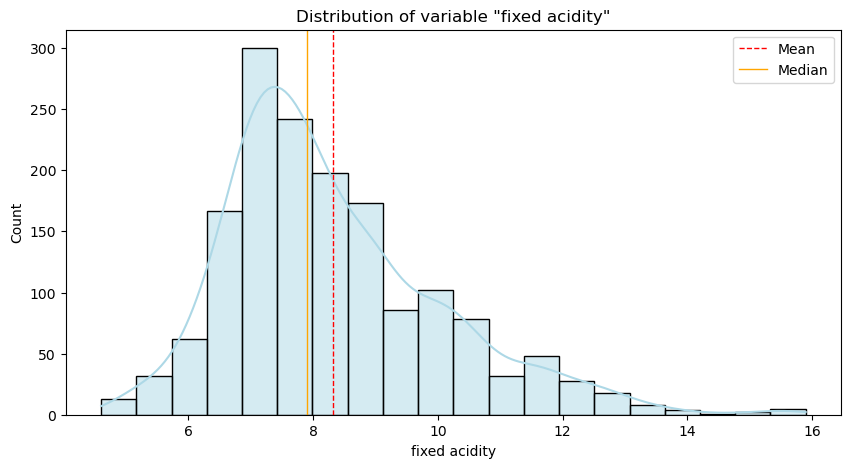

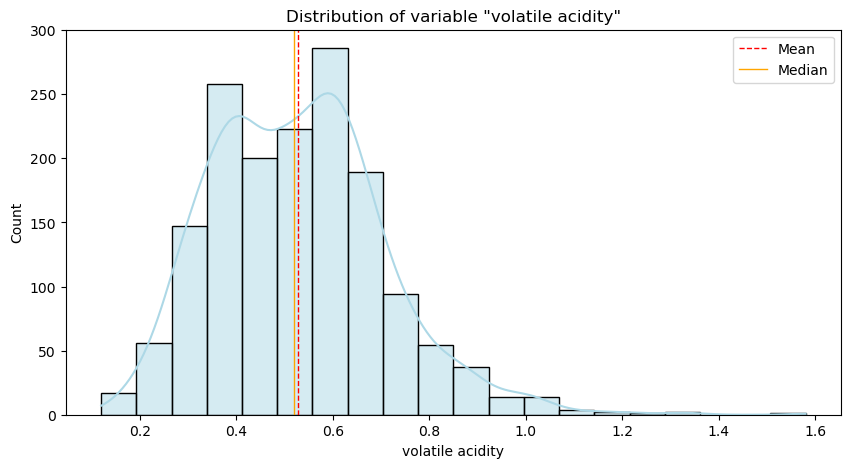

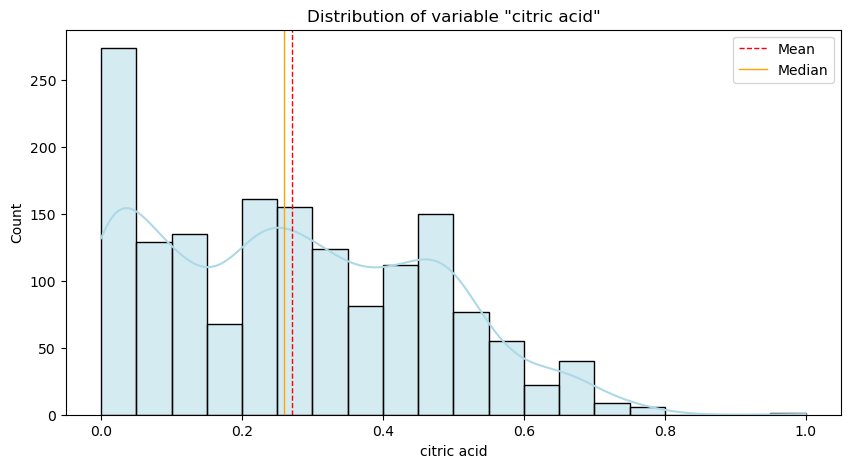

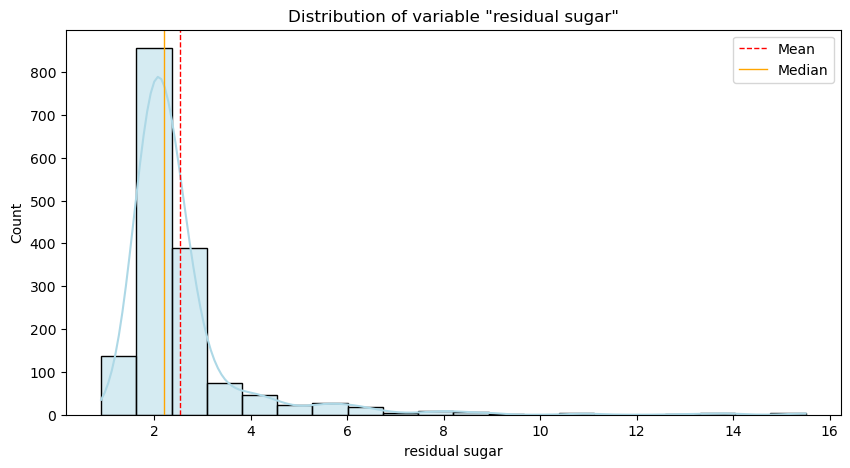

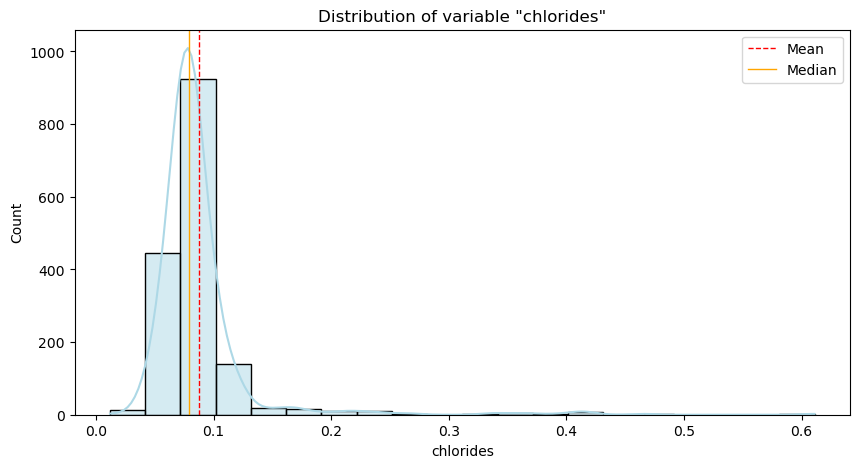

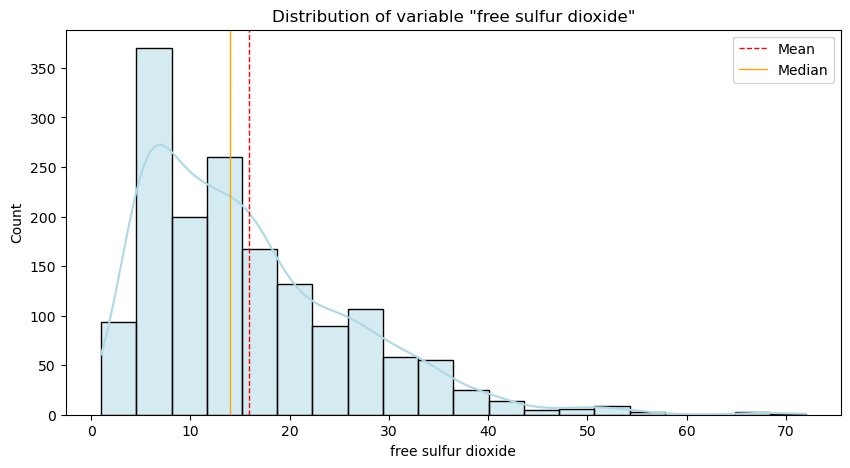

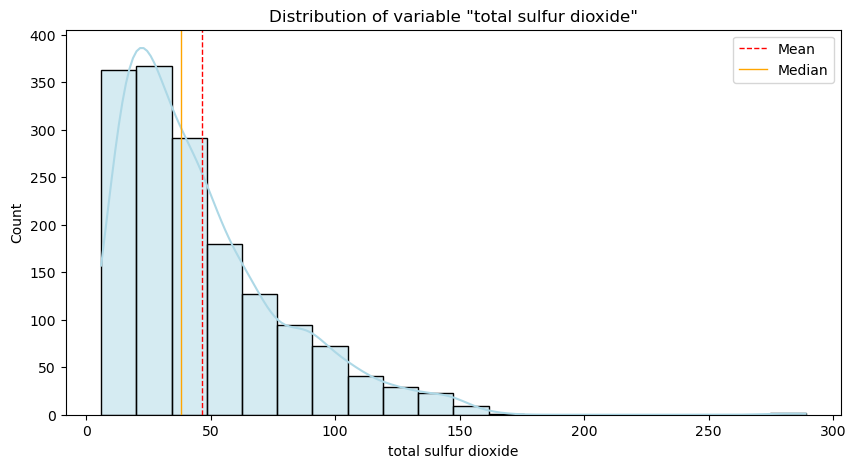

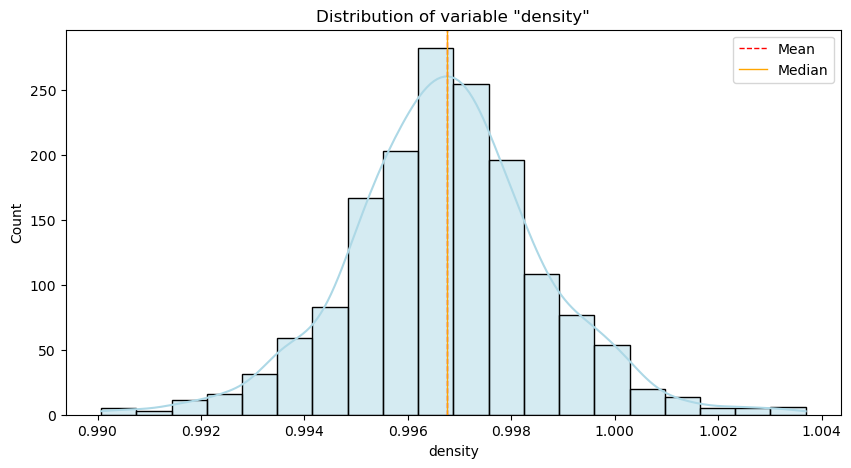

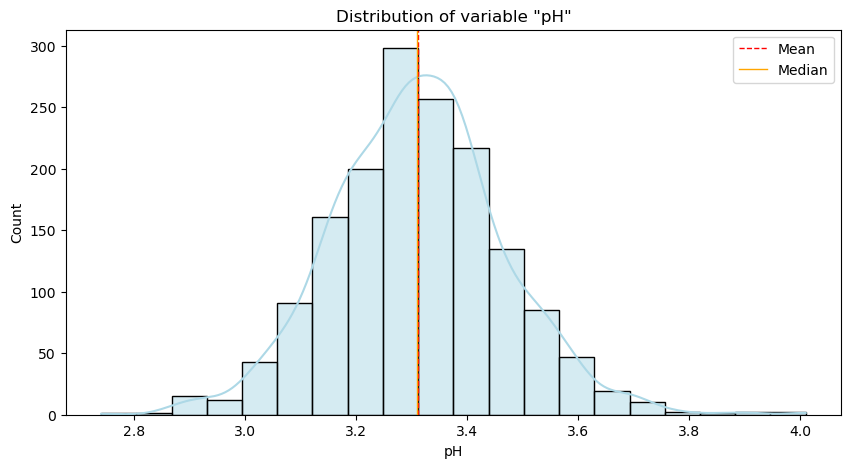

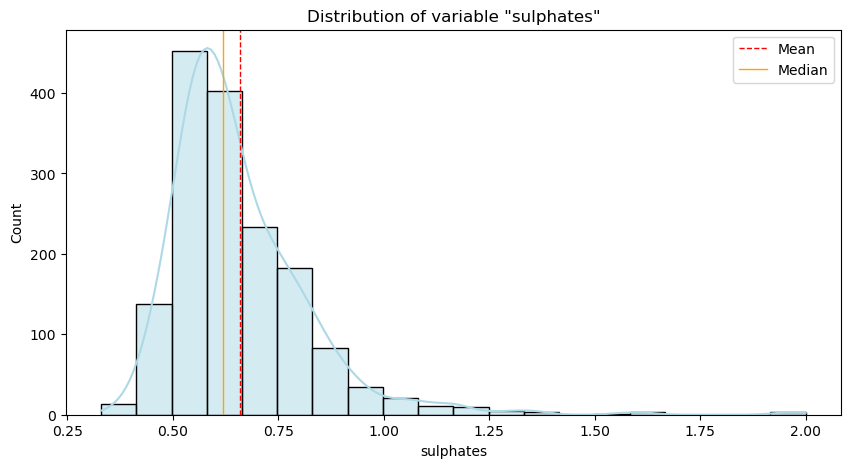

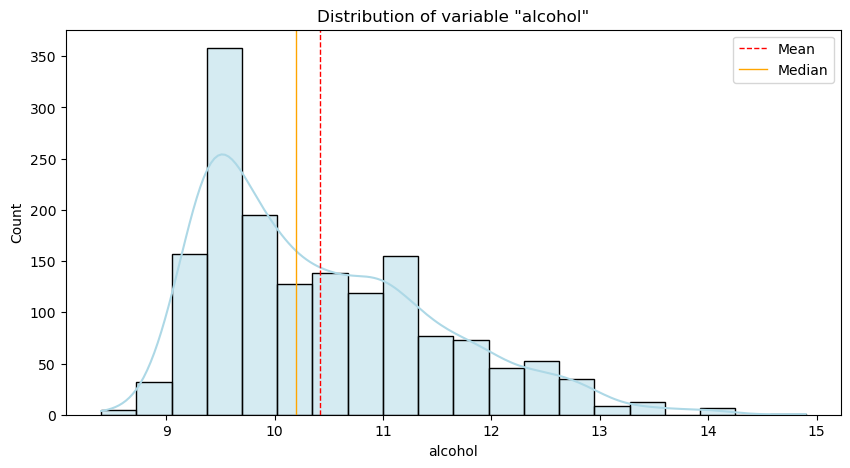

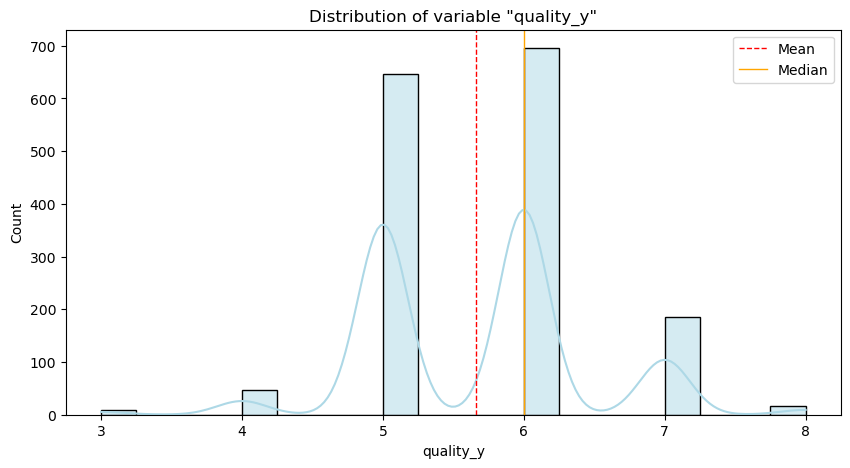

In [27]:
num_cols = df_knn.drop(columns=['id']).columns

for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_knn[col], bins=20, kde=True, color='lightblue')
    plt.axvline(df_knn[col].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_knn[col].median(), color='orange', linewidth=1, label='Median')
    plt.title(f'Distribution of variable "{col}"')
    plt.xlabel(col)
    plt.legend()
    plt.show()

* Fixed Acidity: Right-skewed; most wines have lower acidity, with a few high-acidity outliers.
* Volatile Acidity: Nearly normal distribution, slight right skew, mean and median close.
* Citric Acid: Highly skewed right; many wines have little or no citric acid.
* Residual Sugar: Right-skewed; most wines have low sugar, but some have very high values.
* Chlorides: Right-skewed; most wines have low chloride content, some outliers.
* Free & Total Sulfur Dioxide: Right-skewed with extreme outliers; some wines have very high sulfur dioxide levels.
* Density & pH: Normally distributed; no significant outliers, indicating balanced values.
* Sulphates: Right-skewed; a few wines have very high sulphate levels.

/var/folders/0l/7b8_ztcx19d3zxdnsypbsg1r0000gn/T/ipykernel_77342/1169869083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_knn["quality_y"], palette="Purples")


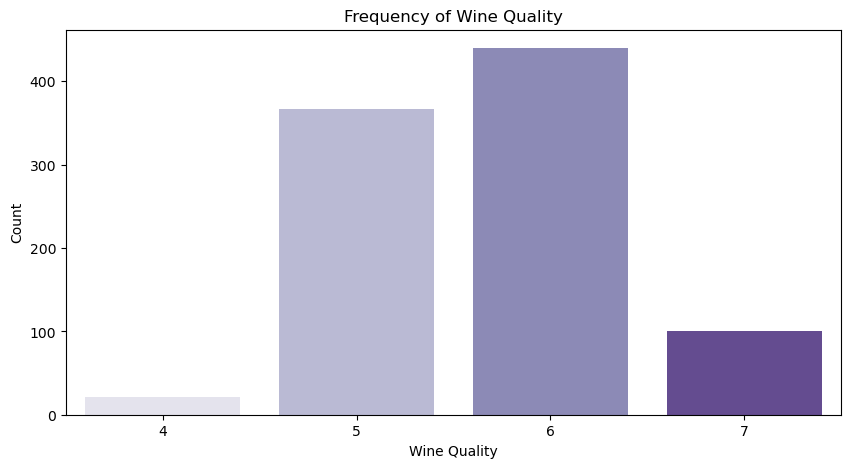

In [85]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df_knn["quality_y"], palette="Purples")
plt.title('Frequency of Wine Quality')
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

Most wines have a quality score of 5 or 6, indicating an average rating.
Fewer wines are rated 3, 4, 7, or 8, meaning extreme quality levels (both low and high) are less common.
The dataset is imbalanced, with a higher concentration of mid-range quality wines.

## Outliers

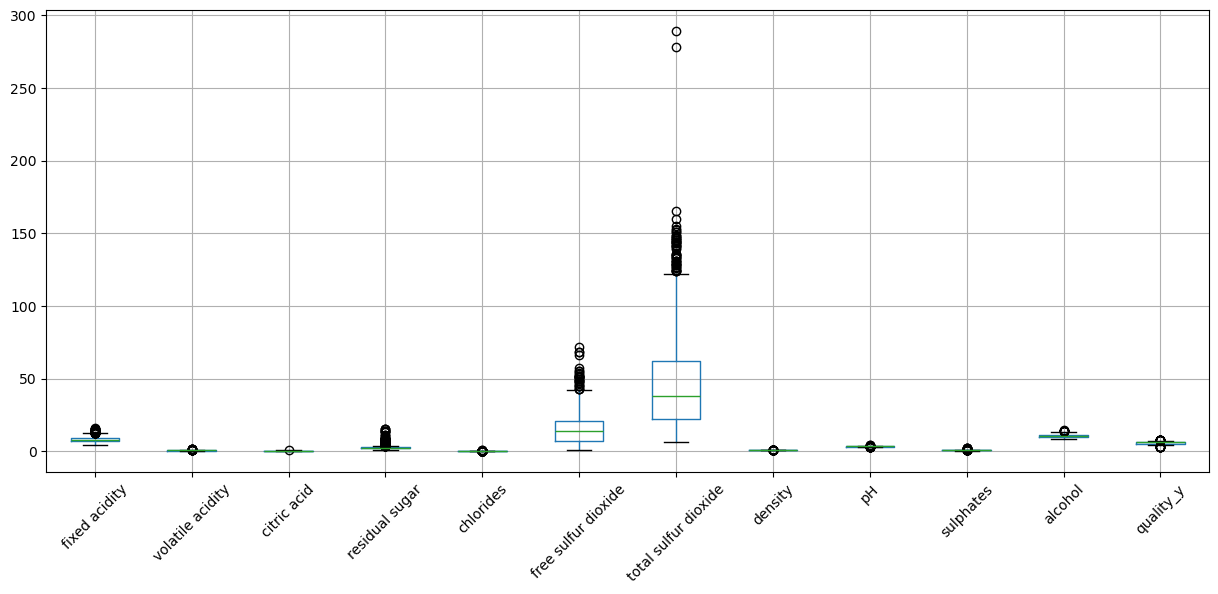

In [32]:
df_knn.drop(columns=['id']).boxplot(figsize=(15, 6), rot=45)
plt.show()

From the plot, we can see that free sulfur dioxide, total sulfur dioxide, residual sugar, and alcohol have many outliers. These could be extreme values that may need further investigation or treatment.

To handle outliers, I used the IQR method which removes values that are significantly lower or higher than the typical range.

For each numerical column Q1 and Q3 were calculated. IQR (Q3 - Q1) was used to define the lower bound (Q1 - 1.5 * IQR) and upper bound (Q3 + 1.5 * IQR).

Any values outside these bounds were removed.

This process was repeated iteratively until no more outliers were detected. This ensures a cleaner dataset without extreme values that could skew analysis.

In [33]:
num_cols = df_knn.drop(columns=['id']).columns

previous_shape = None

while previous_shape != df_knn.shape:
    previous_shape = df_knn.shape
    
    for col in num_cols:
        Q1 = df_knn[col].quantile(0.25)
        Q3 = df_knn[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_knn = df_knn[(df_knn[col] >= lower_bound) & (df_knn[col] <= upper_bound)]

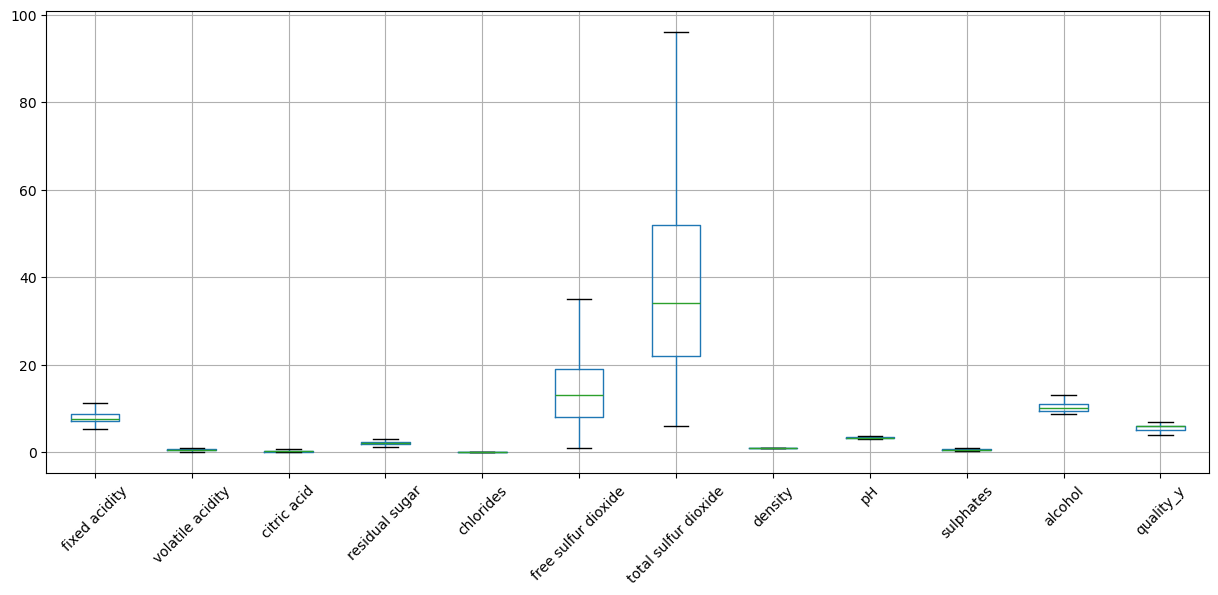

In [34]:
df_knn.drop(columns=['id']).boxplot(figsize=(15, 6), rot=45)
plt.show()

I plotted the boxplot again to check if extreme values were successfully removed.

Now, the dataset looks cleaner, with significantly fewer extreme values, making the data more reliable for analysis.

Some variables, like total sulfur dioxide and free sulfur dioxide, still have a wide range, but extreme points are reduced.

After removing outliers, I re-plotted the distributions of all numerical variables to observe changes:

* Extreme values that caused long tails in some variables are now reduced.
* Mean and median are closer for many variables indicating a less skewed distribution.
* Features like fixed acidity, residual sugar and sulfur dioxide show a noticeable reduction in extreme values.

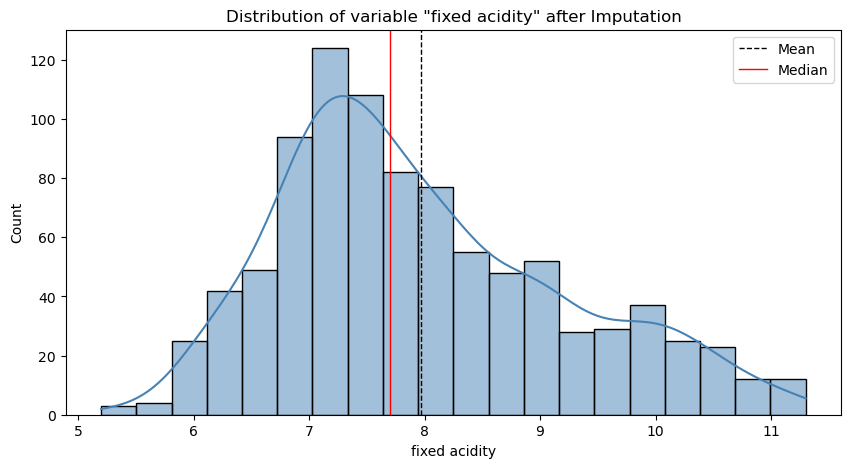

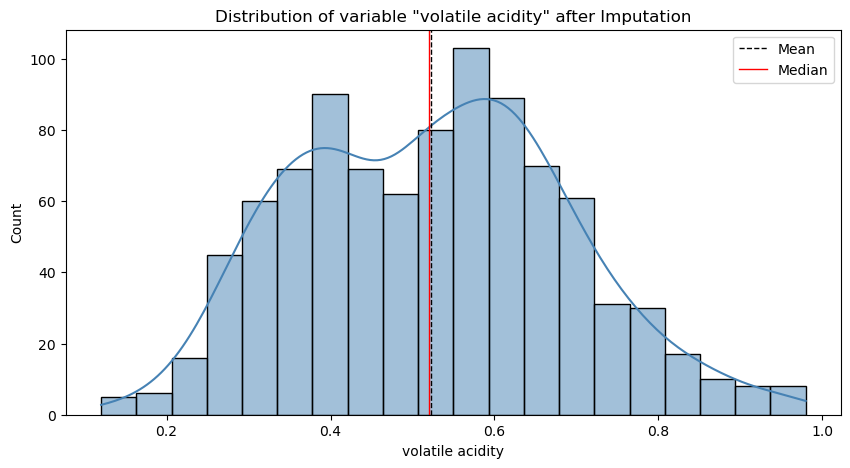

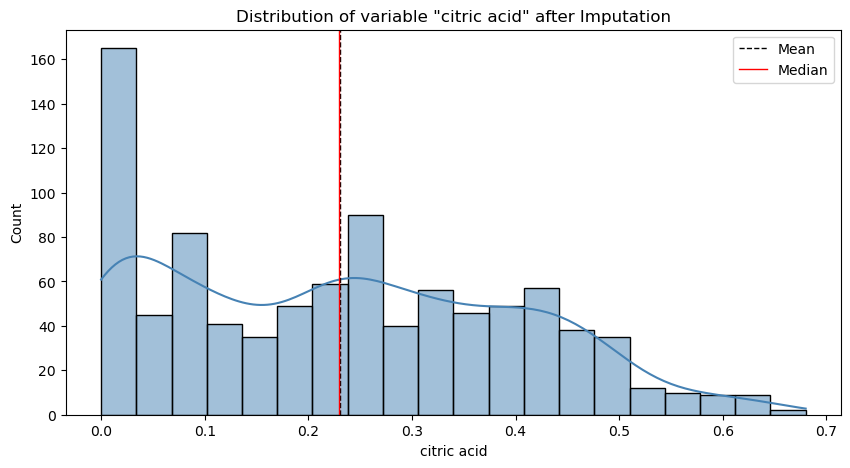

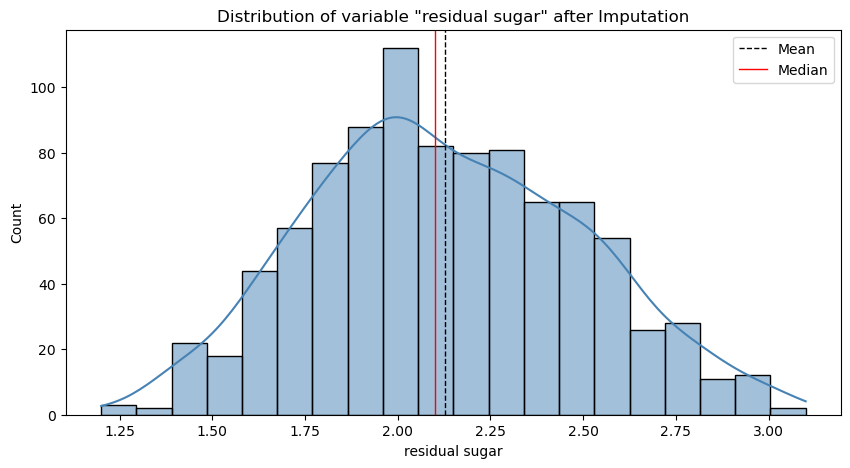

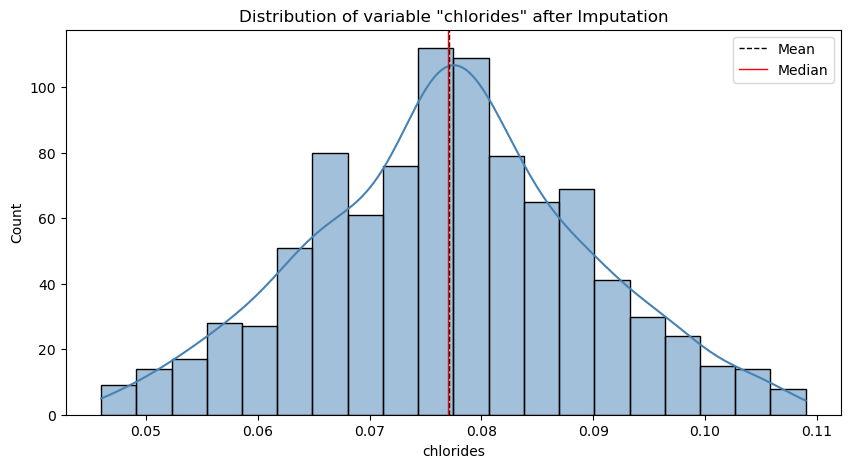

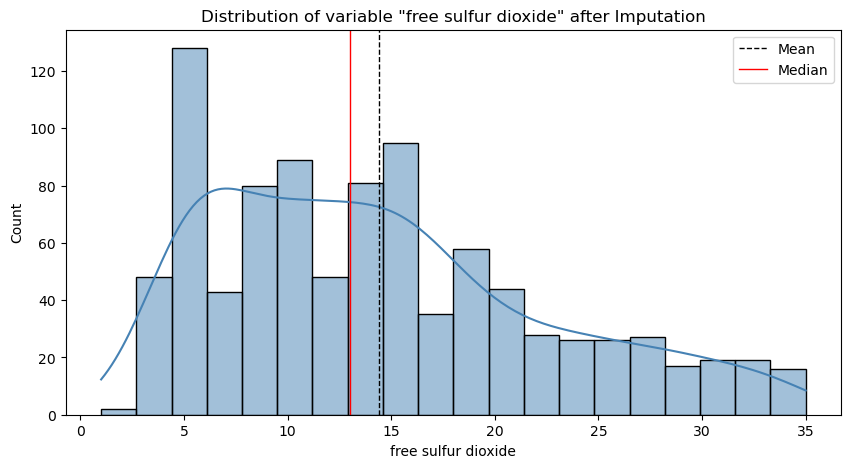

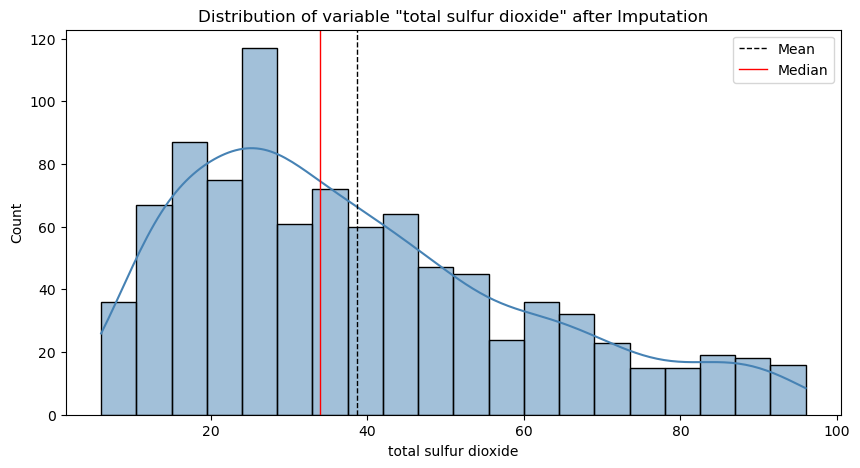

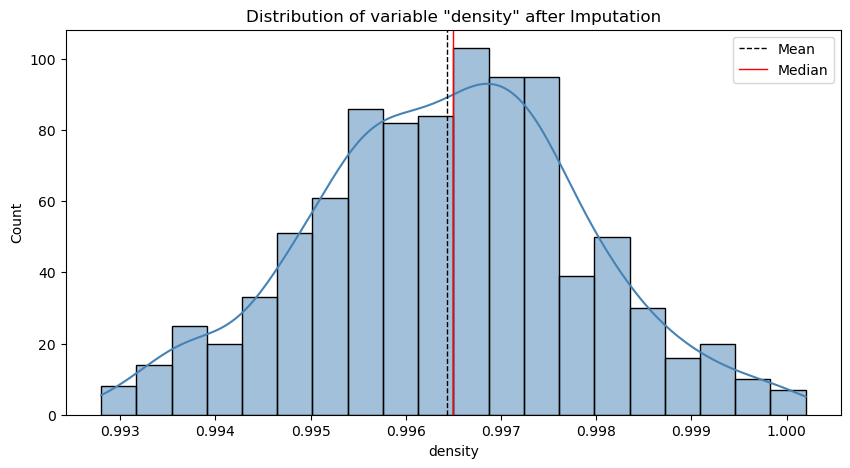

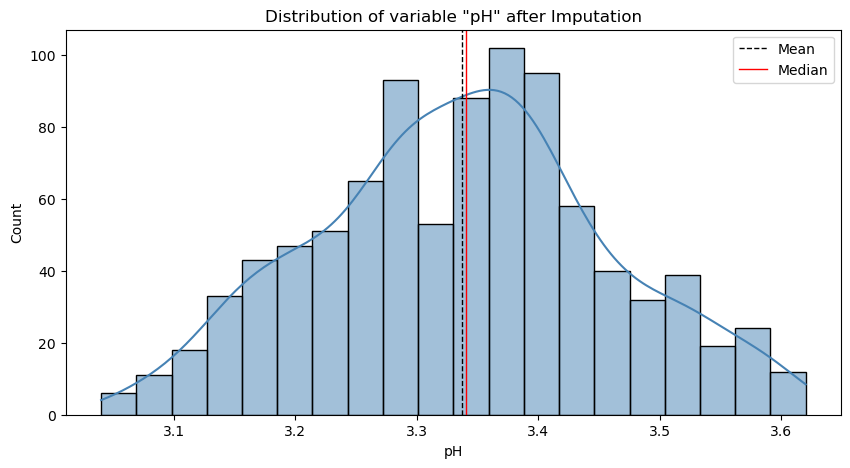

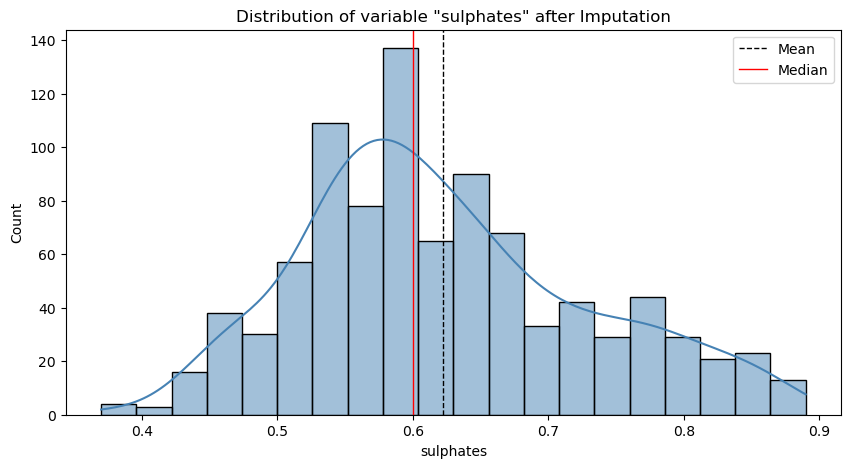

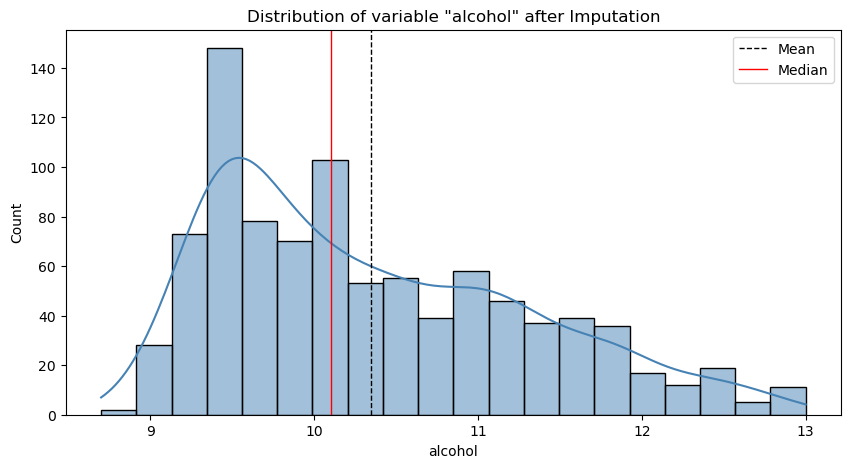

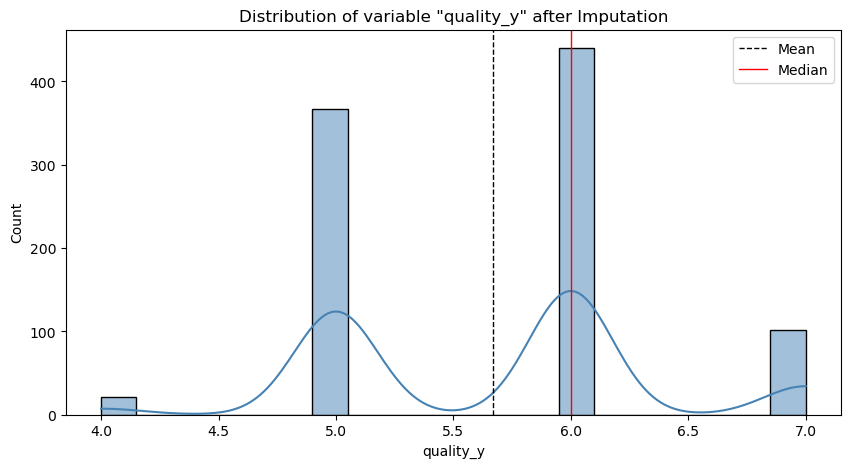

In [35]:
num_cols = df_knn.drop(columns=['id']).columns

for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_knn[col], bins=20, kde=True, color='steelblue')
    plt.axvline(df_knn[col].mean(), color='k', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_knn[col].median(), color='r', linewidth=1, label='Median')
    plt.title(f'Distribution of variable "{col}" after Imputation')
    plt.xlabel(col)
    plt.legend()
    plt.show()

## Relationships Between Variables

In [37]:
bins = [2, 4, 6, 8]
labels = ['Low', 'Medium', 'High']
df_knn['quality_category'] = pd.cut(df_knn['quality_y'], bins=bins, labels=labels)

df_knn['quality_category'].value_counts()

quality_category
Medium    807
High      101
Low        21
Name: count, dtype: int64

As part of feature engineering, I binned the quality_y variable into three categories:

* Low (2-4)
* Medium (4-6)
* High (6-8)
  
This transformation helps in analyzing patterns more effectively, especially when visualizing relationships between quality and other features. Checking value_counts() confirms that most wines fall into the Medium category.

To understand the relationships between variables, I computed the correlation matrix and visualized it using a heatmap. 

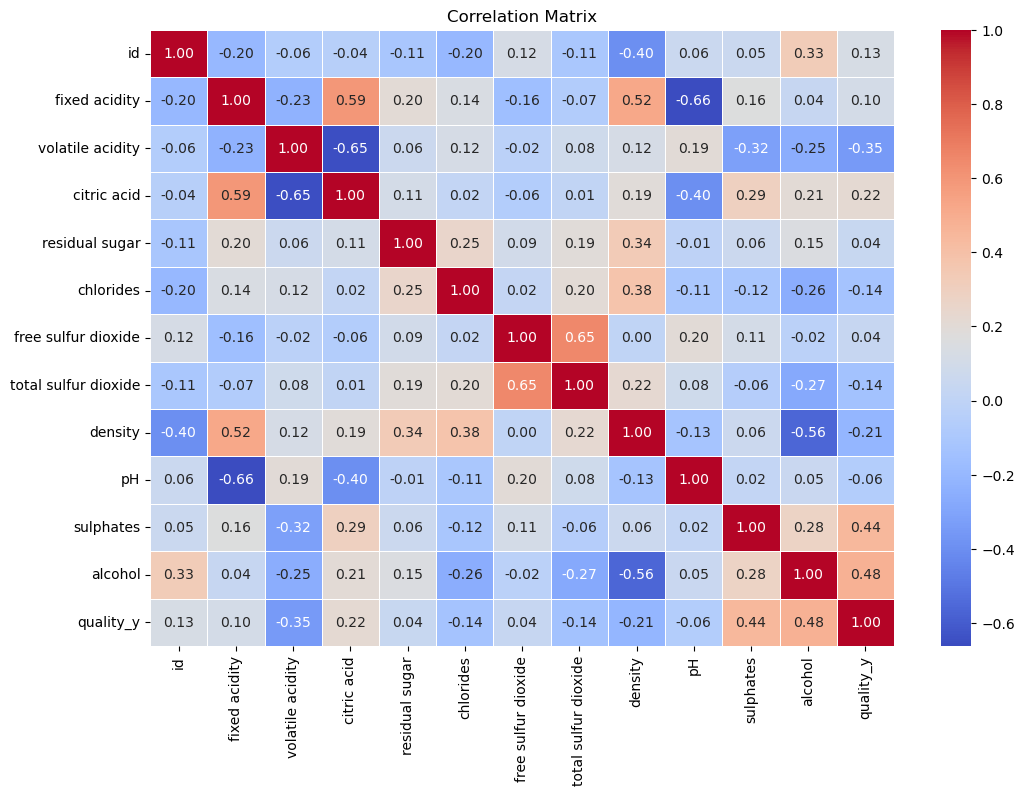

In [38]:
corr_matrix = df_knn.drop(columns=['quality_category']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Strongest correlations with wine quality:

- Higher alcohol content is positively correlated with higher quality.
- More sulphates might contribute to better quality.
- Higher volatile acidity is associated with lower quality.

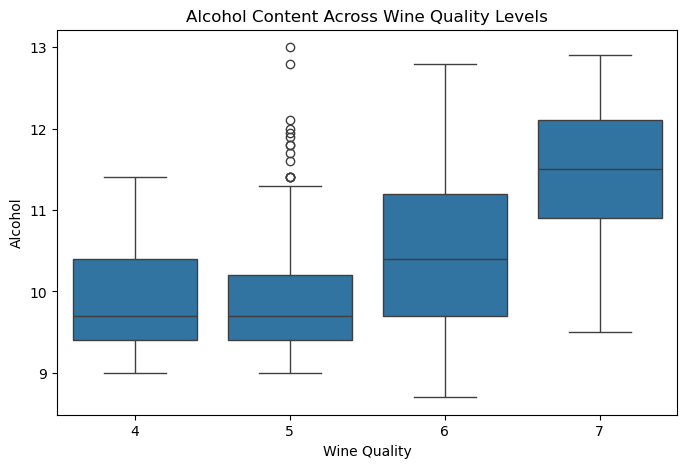

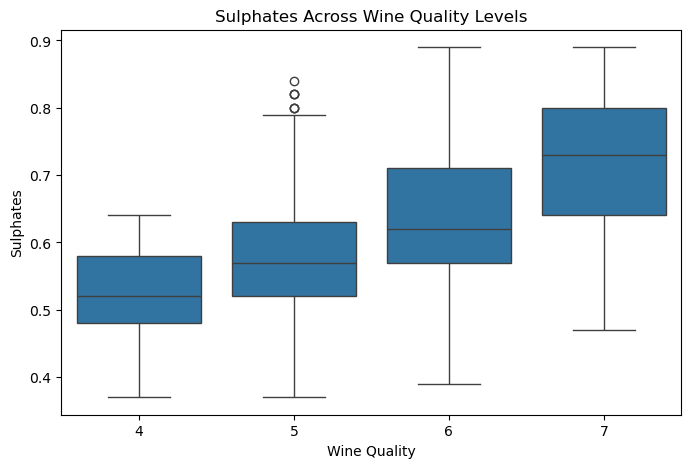

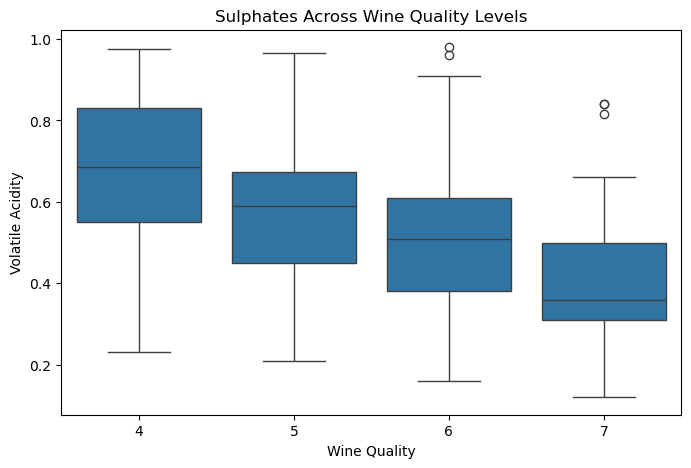

In [40]:
# Alcohol content across different quality levels
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_knn['quality_y'], y=df_knn['alcohol'])
plt.title("Alcohol Content Across Wine Quality Levels")
plt.xlabel("Wine Quality")
plt.ylabel("Alcohol")
plt.show()

# Sulphates across different quality levels
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_knn['quality_y'], y=df_knn['sulphates'])
plt.title("Sulphates Across Wine Quality Levels")
plt.xlabel("Wine Quality")
plt.ylabel("Sulphates")
plt.show()

# Volatle Acidity across different quality levels
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_knn['quality_y'], y=df_knn['volatile acidity'])
plt.title("Sulphates Across Wine Quality Levels")
plt.xlabel("Wine Quality")
plt.ylabel("Volatile Acidity")
plt.show()

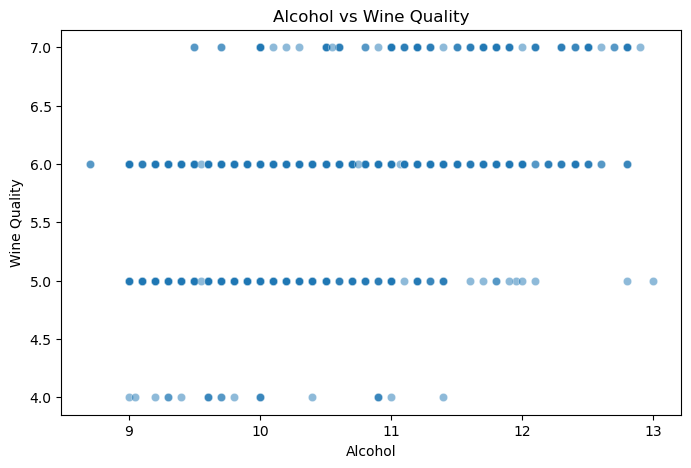

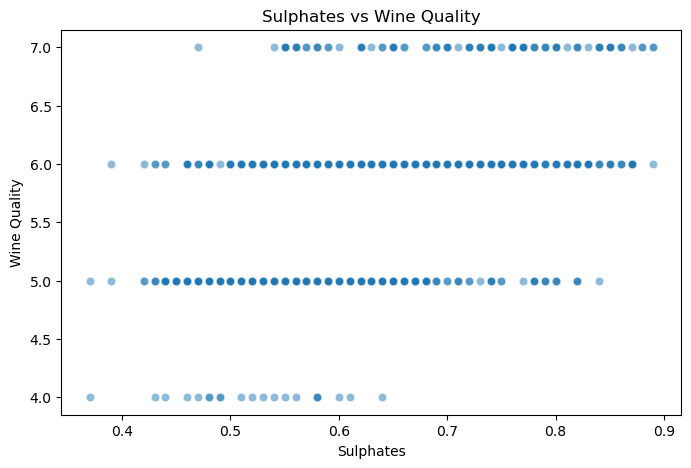

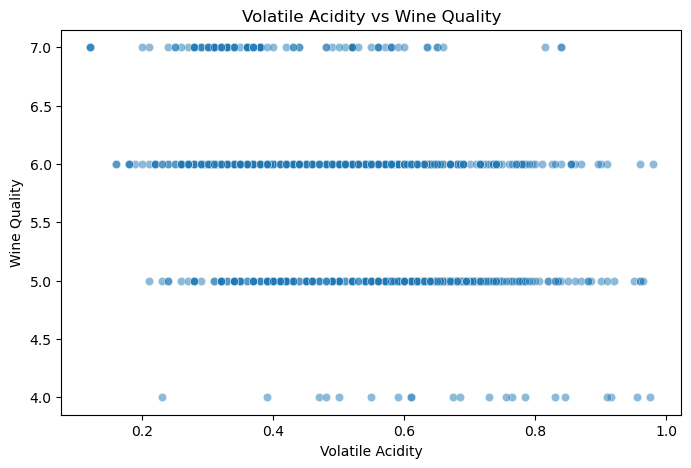

In [41]:
# Alcohol content across different quality levels
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_knn['alcohol'], y=df_knn['quality_y'], alpha=0.5)
plt.title("Alcohol vs Wine Quality")
plt.xlabel("Alcohol")
plt.ylabel("Wine Quality")
plt.show()

# Sulphates across different quality levels
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_knn['sulphates'], y=df_knn['quality_y'], alpha=0.5)
plt.title("Sulphates vs Wine Quality")
plt.xlabel("Sulphates")
plt.ylabel("Wine Quality")
plt.show()

# Volatle Acidity across different quality levels
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_knn['volatile acidity'], y=df_knn['quality_y'], alpha=0.5)
plt.title("Volatile Acidity vs Wine Quality")
plt.xlabel("Volatile Acidity")
plt.ylabel("Wine Quality")
plt.show()